In [1]:
import pandas as pd
import numpy as np
import chess 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
np.complex_ = np.complex128
np.float_ = np.float64
np.string_ = np.bytes_
np.unicode_ = np.str_
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("lichess_db_puzzle.csv")

df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN


In [9]:
print(df['Themes'][:20])

0        crushing hangingPiece long middlegame
1                      advantage endgame short
2          advantage endgame rookEndgame short
3                   advantage middlegame short
4                        crushing endgame long
5            crushing endgame long pawnEndgame
6                   endgame mate mateIn2 short
7            advantage master middlegame short
8                mate mateIn2 middlegame short
9      advantage hangingPiece middlegame short
10                   crushing middlegame short
11    crushing endgame exposedKing long skewer
12          crushing endgame fork master short
13         crushing endgame short trappedPiece
14                  advantage middlegame short
15              advantage fork long middlegame
16                 advantage endgame pin short
17               advantage middlegame veryLong
18                  advantage endgame long pin
19     backRankMate endgame mate mateIn2 short
Name: Themes, dtype: object


In [10]:
def parse_themes(theme_string):
    if isinstance(theme_string, str):
        return theme_string.split()
sample_theme = "crushing hangingPiece long middlegame"
tags = parse_themes(sample_theme)
print(tags) 

['crushing', 'hangingPiece', 'long', 'middlegame']


In [11]:
df['Themes'].isnull().sum()

0

In [12]:
df['ParsedThemes'] = df['Themes'].apply(parse_themes)

df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,ParsedThemes
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,"[crushing, hangingPiece, long, middlegame]"
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,"[advantage, endgame, short]"
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,"[advantage, endgame, rookEndgame, short]"
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,"[advantage, middlegame, short]"
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN,"[crushing, endgame, long]"
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,"[crushing, endgame, long, pawnEndgame]"
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,"[endgame, mate, mateIn2, short]"
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...,"[advantage, master, middlegame, short]"
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,"[mate, mateIn2, middlegame, short]"
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN,"[advantage, hangingPiece, middlegame, short]"


In [59]:
# all_tags = [tag for themes in df['ParsedThemes'] for tag in themes]
from collections import Counter
# tag_counts = Counter(all_tags)
# print(tag_counts)
all_labels = [label for labels in df["ParsedThemes"] for label in labels]
label_counter = Counter(all_labels)

# Function to refine a list of labels
# def refine_labels(labels):
#     refined = []
#     for label in labels:
#         if label_counter[label] < 30000:
#             # For low-frequency labels, if they contain "mate", map them to "mate"
#             if "mate" in label.lower():
#                 if "mate" not in refined:
#                     refined.append("mate")
#             # Otherwise, ignore the label.
#         else:
#             refined.append(label)
#     # Remove duplicates (if any) by converting to set then back to list.
#     return list(set(refined))

# # Apply this function to the ParsedThemes column
# df["RefinedThemes"] = df["ParsedThemes"].apply(refine_labels)

# # Let's check some examples:
# print(df[["ParsedThemes", "RefinedThemes"]][10:20])

# # Optionally, you might want to see the new label distribution:
# all_refined = [label for labels in df["RefinedThemes"] for label in labels]
# refined_counter = Counter(all_refined)
# print("New label frequencies:", refined_counter)

In [60]:
import random
allowed_set = {"mate", "fork", "pin", "skewer", "sacrifice", "rookEndgame", "pawnEndgame", "hangingPiece", "discoveredAttack"}

def select_core_label(themes):
    """
    For a list of themes, convert any mate variants to 'mate',
    then keep only those in allowed_set.
    If multiple remain, choose one at random.
    Returns None if no allowed label is found.
    """
    selected = []
    for label in themes:
        # Merge any label containing 'mate' (case-insensitive) into "mate"
        if "mate" in label.lower():
            selected.append("mate")
        elif label in allowed_set:
            selected.append(label)
    # Remove duplicates
    selected = list(set(selected))
    return list(set(selected))

# Make sure ParsedThemes are real lists. If they're strings, convert them:
import ast
if df["ParsedThemes"].apply(lambda x: isinstance(x, str)).any():
    df["ParsedThemes"] = df["ParsedThemes"].apply(ast.literal_eval)

# Apply the function to create a new column "CoreLabel"
df["CoreLabel"] = df["ParsedThemes"].apply(select_core_label)

# Drop rows with no core label
core_tactics_df = df[df["CoreLabel"].apply(lambda x: len(x) > 0)].copy()
core_tactics_df.reset_index(drop=True, inplace=True)

# Check the result:
print(core_tactics_df[["ParsedThemes", "CoreLabel"]].head(10))
len(core_tactics_df)


                                     ParsedThemes       CoreLabel
0      [crushing, hangingPiece, long, middlegame]  [hangingPiece]
1        [advantage, endgame, rookEndgame, short]   [rookEndgame]
2          [crushing, endgame, long, pawnEndgame]   [pawnEndgame]
3                 [endgame, mate, mateIn2, short]          [mate]
4              [mate, mateIn2, middlegame, short]          [mate]
5    [advantage, hangingPiece, middlegame, short]  [hangingPiece]
6  [crushing, endgame, exposedKing, long, skewer]        [skewer]
7        [crushing, endgame, fork, master, short]          [fork]
8             [advantage, fork, long, middlegame]          [fork]
9                [advantage, endgame, pin, short]           [pin]


3016647

In [64]:
core_tactics_df
from tqdm import tqdm

sample = core_tactics_df.head(50000).copy()

# Extract first move from the Moves column
sample["FirstMove"] = sample["Moves"].str.split().str[0]

# Apply the first move to each FEN
updated_fens = []
for fen, move in tqdm(zip(sample["FEN"], sample["FirstMove"]), total=len(sample)):
    try:
        board = chess.Board(fen)
        board.push_uci(move)
        updated_fens.append(board.fen())
    except:
        updated_fens.append(None)

# Save result in sample DataFrame
sample["FEN_after_first_move"] = updated_fens

# Drop failed rows
sample = sample.dropna(subset=["FEN_after_first_move"]).reset_index(drop=True)

print(sample.head(10))
len(sample)

100%|██████████| 50000/50000 [00:08<00:00, 5694.49it/s]


  PuzzleId                                                FEN  \
0    00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1    0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
2    000Vc             8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53   
3    000Zo  4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...   
4    000hf  r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...   
5    000lC  3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...   
6    000qP            8/7R/8/5p2/4bk1P/8/2r2K2/6R1 w - - 7 51   
7    000rO          3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58   
8    0017R  r2qk2r/pp2ppbp/1n1p2p1/3Pn3/2P5/2NBBP1P/PP3P2/...   
9    0018S  2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1942               75          95   
1            e7f7 f5e5 e2f1 e5e6    1257               78          90   
2  g4h5 g6h5 f4f5 e6e5 f5f6 e5f6    1575               80        

50000

In [44]:
piece_to_channel = {
    'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
    'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
}

In [75]:
# def fen_to_board_array(fen):
#     """
#     Converts a FEN string into an 8x8x12 numpy array.
#     Each square is one-hot encoded into 12 channels representing the piece types.
#     """
#     board = chess.Board(fen)
#     board_array = np.zeros((8, 8, 12), dtype=np.float32)
    
#     for square, piece in board.piece_map().items():
#         row = square // 8   # row: 0 (top) to 7 (bottom)
#         col = square % 8
#         channel = piece_to_channel[piece.symbol()]
#         board_array[row, col, channel] = 1.0
    
#     return board_array

# example_fen = sample["FEN_after_first_move"].iloc[0]
# print("Example FEN:", example_fen)
# print("Board array shape:", fen_to_board_array(example_fen).shape)
def fen_to_board_array(fen):
    """
    Converts a FEN string into an 8x8x19 numpy array.
    Channels:
      0-11: Basic one-hot encoding for pieces.
      12: Attacked by White (1 if square is attacked by at least one white piece).
      13: Attacked by Black.
      14: White kingside castling rights (entire plane: 1 if available, else 0).
      15: White queenside castling rights.
      16: Black kingside castling rights.
      17: Black queenside castling rights.
      18: Side-to-move (entire plane: 1 if White, 0 if Black).
    """
    board = chess.Board(fen)
    board_array = np.zeros((8, 8, 19), dtype=np.float32)
    
    # --- 8x8x12 one-hot encoding for pieces ---
    for square, piece in board.piece_map().items():
        row = square // 8
        col = square % 8
        channel = piece_to_channel[piece.symbol()]
        board_array[row, col, channel] = 1.0
    
    # --- Attacked squares channels ---
    # Channel 12: attacked by white; Channel 13: attacked by black.
    for square in chess.SQUARES:
        row = square // 8
        col = square % 8
        if board.is_attacked_by(chess.WHITE, square):
            board_array[row, col, 12] = 1.0
        if board.is_attacked_by(chess.BLACK, square):
            board_array[row, col, 13] = 1.0

    # --- Castling rights channels ---
    # Channels 14-17: constant planes for castling rights.
    castling_channels = [14, 15, 16, 17]
    # White kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 14] = flag
    # White queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 15] = flag
    # Black kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 16] = flag
    # Black queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 17] = flag

    # --- Side-to-move channel ---
    # Channel 18: fill the plane with 1 if White's turn, else 0.
    side = 1.0 if board.turn == chess.WHITE else 0.0
    board_array[:, :, 18] = side

    return board_array

example_fen = sample["FEN_after_first_move"].iloc[0]
refined_board = fen_to_board_array(example_fen)
print("Example FEN:", example_fen)
print("Refined board array shape:", refined_board.shape)

Example FEN: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25
Refined board array shape: (8, 8, 19)


In [76]:
X_list = []
for fen in tqdm(sample["FEN_after_first_move"], desc="Converting FENs to board arrays"):
    board_array = fen_to_board_array(fen)
    X_list.append(board_array)
X = np.array(X_list)
print("X shape:", X.shape)

# Prepare the labels using the full RefinedThemes column (all tactical motifs)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(sample["CoreLabel"])
print("y shape:", y.shape)
print("Label space (all parsed themes):", mlb.classes_)

Converting FENs to board arrays:   0%|          | 0/50000 [00:00<?, ?it/s]

Converting FENs to board arrays: 100%|██████████| 50000/50000 [00:18<00:00, 2693.98it/s]


X shape: (50000, 8, 8, 19)
y shape: (50000, 9)
Label space (all parsed themes): ['discoveredAttack' 'fork' 'hangingPiece' 'mate' 'pawnEndgame' 'pin'
 'rookEndgame' 'sacrifice' 'skewer']


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 19), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(mlb.classes_), activation='sigmoid') 
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/Users/faris/Desktop/AllProjects/chesspuzzlelearner/backend/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,961 (2.10 MB)

 Trainable params: 549,769 (2.10 MB)

 Non-trainable params: 192 (768.00 B)

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.4220 - loss: 0.3496 - val_accuracy: 0.5409 - val_loss: 0.2682
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5328 - loss: 0.2749 - val_accuracy: 0.5685 - val_loss: 0.2487
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.5619 - loss: 0.2582 - val_accuracy: 0.5670 - val_loss: 0.2497
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.5764 - loss: 0.2467 - val_accuracy: 0.5809 - val_loss: 0.2444
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.5950 - loss: 0.2371 - val_accuracy: 0.5962 - val_loss: 0.2349
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6033 - loss: 0.2285 - val_accuracy: 0.6036 - val_loss: 0.2295
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6177 - loss: 0.2209 - val_accuracy: 0.6020 - val_loss: 0.2301
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6258 -

In [93]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.35).astype(int)

from sklearn.metrics import f1_score, hamming_loss

f1 = f1_score(y_test, y_pred_binary, average='micro')
h_loss = hamming_loss(y_test, y_pred_binary)

print("F1 Score (micro):", f1)
print("Hamming Loss:", h_loss)

true_labels = mlb.inverse_transform(y_test)
pred_labels = mlb.inverse_transform(y_pred_binary)

print("\nSample Predictions:")
for i in range(5):
    print(f"Sample #{i+1}")
    print("  True Labels:     ", true_labels[i])
    print("  Predicted Labels:", pred_labels[i])
    print()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
F1 Score (micro): 0.6173709994963601
Hamming Loss: 0.09285555555555555

Sample Predictions:
Sample #1
  True Labels:      ('mate',)
  Predicted Labels: ('fork',)

Sample #2
  True Labels:      ('fork',)
  Predicted Labels: ()

Sample #3
  True Labels:      ('rookEndgame',)
  Predicted Labels: ('rookEndgame',)

Sample #4
  True Labels:      ('hangingPiece', 'mate')
  Predicted Labels: ('mate',)

Sample #5
  True Labels:      ('mate',)
  Predicted Labels: ('mate',)



In [94]:
from sklearn.metrics import precision_score, recall_score

precision_micro = precision_score(y_test, y_pred_binary, average='micro')
recall_micro = recall_score(y_test, y_pred_binary, average='micro')

# Compute macro-average precision and recall
precision_macro = precision_score(y_test, y_pred_binary, average='macro')
recall_macro = recall_score(y_test, y_pred_binary, average='macro')

print("Precision (micro):", precision_micro)
print("Recall (micro):", recall_micro)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)

Precision (micro): 0.6710460834079824
Recall (micro): 0.5716465999660845
Precision (macro): 0.6668395429704259
Recall (macro): 0.4021511854142656


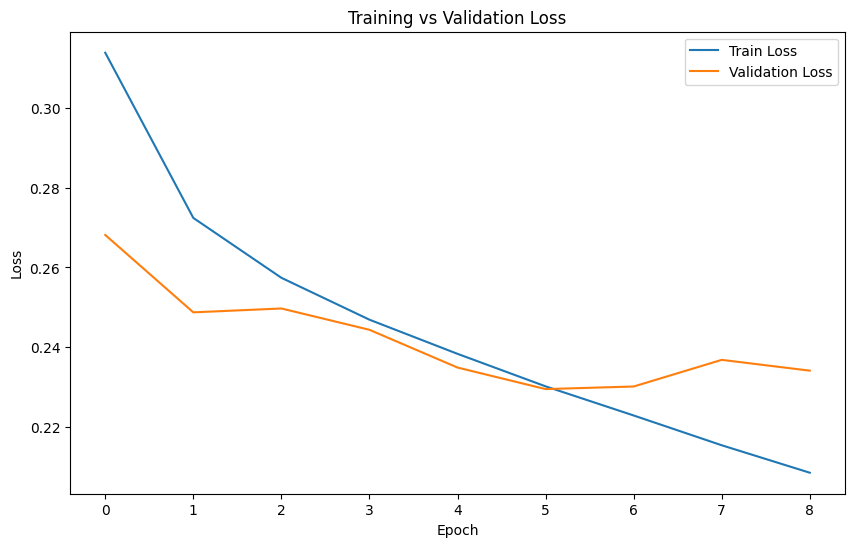

In [95]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
